# Heart logistic regression
### Hyperparameters of the logistic regression model:
* Since it is similar to linear regression, the network is already defined as a 1 neuron combining all the features of the input with an activation function that is sigmoid so layer number and number of units are not hyperparameters in this specific problem.
* Regularization type, and term is a hyper parameter to be tuned(We will find that we need to use regularization due to overfitting).
* The type of optimizer and its parameters.
* Learning rate (We will need to tune it so we reach convergence).



In [0]:
# %xmode Plain
# %pdb on
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.regularizers import l1,l2
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
dataset = pd.read_csv("heart.csv")

X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
def test_model(reg, opt, loss, train_X, train_y, verbose = 0):
  ## START CODE HERE
  def Model(input_shape):
    model = Sequential()
    model.add(Dense(1, input_shape = input_shape, kernel_initializer = 'normal' , kernel_regularizer=reg))
    model.add(Activation('sigmoid'))
    return model
  model = Model(train_X.shape[1:])
  ## END CODE HERE
  model.compile(loss=loss, metrics=['accuracy'], optimizer=opt)
  history = model.fit(train_X, train_y, verbose=verbose, batch_size=1, epochs=150, validation_split=0.1 )
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  print('Last validation loss : ', history.history['val_loss'][-1], ' | last training loss : ', history.history['loss'][-1])
  print('Last validation accuracy : ', history.history['val_acc'][-1], ' | last training accuracy : ', history.history['acc'][-1])
  return model

---
# Model Configurations



### Default logistic regression without regularization and no artificial variables with Adam optimizer with default values with binary crossentropy as loss 

In [0]:
models = []

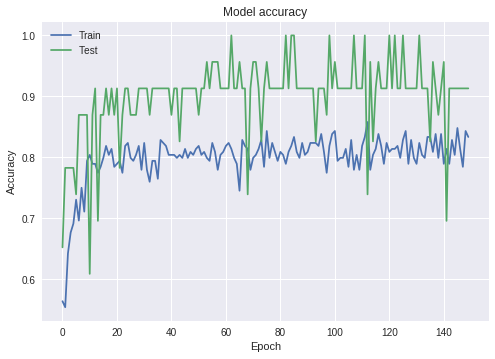

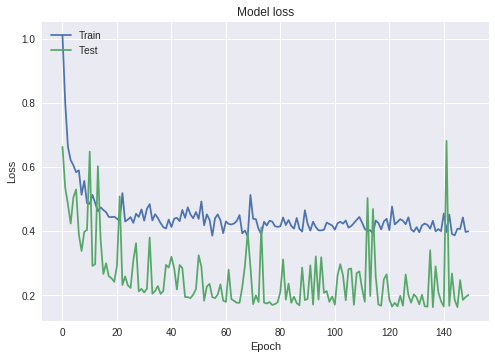

Last validation loss :  0.2007818983503334  | last training loss :  0.3991374346272399
Last validation accuracy :  0.9130434782608695  | last training accuracy :  0.8333333333333334


In [127]:
models.append(test_model(None, 'Adam', 'binary_crossentropy', train_X, train_y))

### Default logistic regression with no regularization and no artificial variables with Adam optimizer with default values with mse as loss 

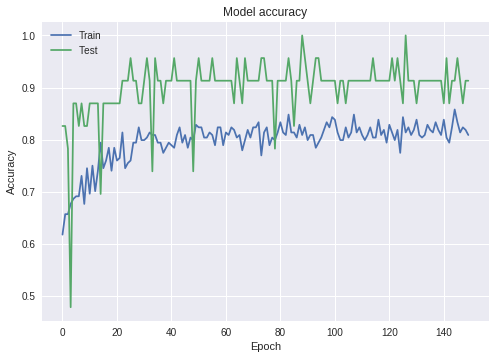

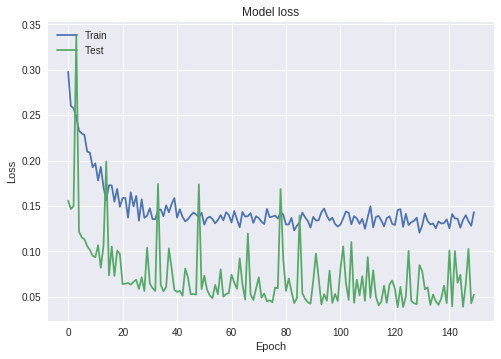

Last validation loss :  0.05239429693742058  | last training loss :  0.1432699806389326
Last validation accuracy :  0.9130434782608695  | last training accuracy :  0.8088235294117647


In [20]:
models.append(test_model(None, 'Adam', 'mse', train_X, train_y))

### Default logistic regression with l1 regularization (0.1) and no artificial variables with Adam optimizer with default values with binary crossentropy as loss 

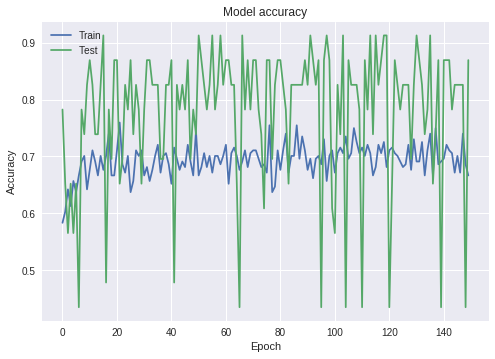

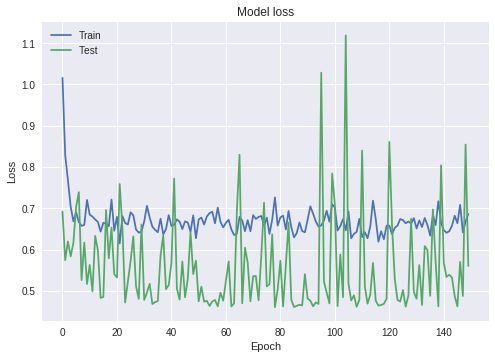

Last validation loss :  0.5601213062586992  | last training loss :  0.6862971161072161
Last validation accuracy :  0.8695652173913043  | last training accuracy :  0.6666666666666666


In [129]:
models.append(test_model(l1(0.1), 'Adam', 'binary_crossentropy', train_X, train_y))

### Default logistic regression with l1 regularization (0.2) and no artificial variables with Adam optimizer with default values with binary crossentropy as loss 

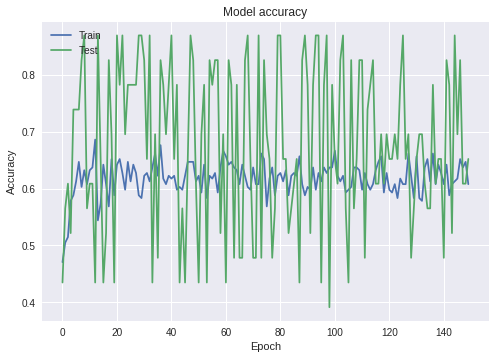

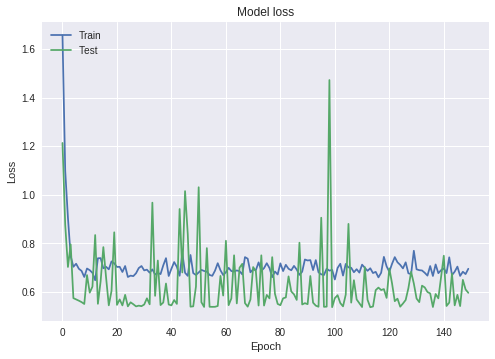

Last validation loss :  0.5953691841467567  | last training loss :  0.6944774019659734
Last validation accuracy :  0.6521739130434783  | last training accuracy :  0.6078431372549019


In [130]:
models.append(test_model(l1(0.2), 'Adam', 'binary_crossentropy', train_X, train_y))

Regularization lowers performance, and since overfitting doesn't seem to be problem, it is better not to use it.

### Default logistic regression with no regularization and no artificial variables with RMSprop optimizer with default values with binary crossentropy as loss 

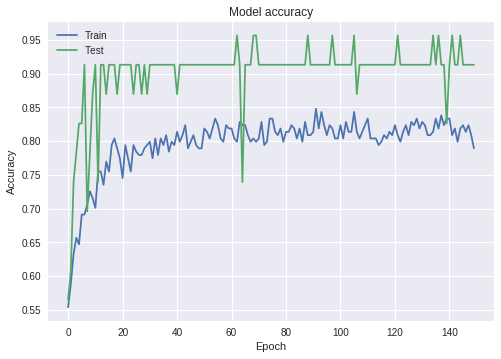

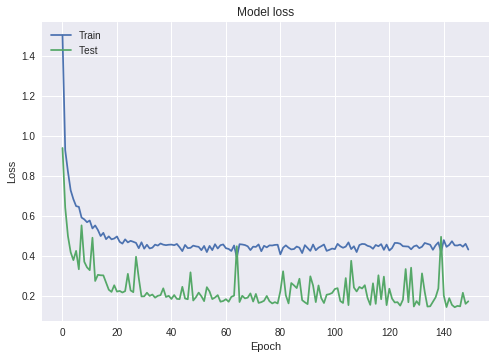

Last validation loss :  0.17339704824616606  | last training loss :  0.4318031250157076
Last validation accuracy :  0.9130434782608695  | last training accuracy :  0.7892156862745098


In [136]:
models.append(test_model(None, 'RMSprop', 'binary_crossentropy', train_X, train_y))

### Default logistic regression with no regularization and no artificial variables with Adam optimizer with learning rate of 0.0005 with mse as loss 

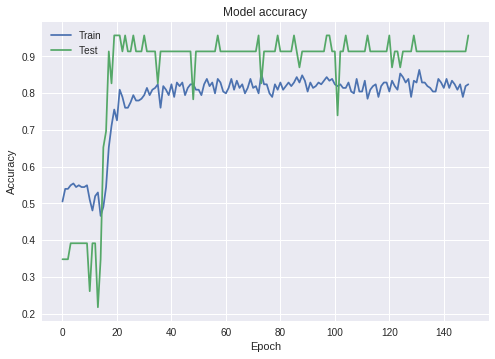

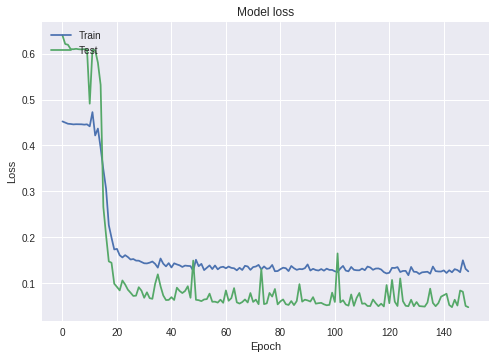

Last validation loss :  0.047804697226163866  | last training loss :  0.1258518889365251
Last validation accuracy :  0.9565217391304348  | last training accuracy :  0.8235294117647058


In [17]:
models.append(test_model(None, Adam(0.0005), 'mse', train_X, train_y))

# Adding artifical variable combinations
Add 3 features which are the product of some of the continous features, and a relation between age and sex.

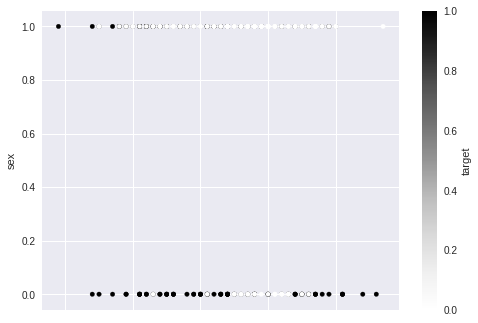

In [45]:
dataset.plot.scatter(x=0, y=1, c=13)
plt.show()
scaler = StandardScaler()
mod_train_x_std = scaler.fit_transform(train_X)
mod_train_x = np.zeros((train_X.shape[0], train_X.shape[1] + 3))
mod_train_x[:,:-3] = mod_train_x_std
for i in range(len(mod_train_x)):
  if train_X[i,1] == 1:
    mod_train_x[i, 13] = mod_train_x[i, 0]
  else:
    mod_train_x[i, 13] = -mod_train_x[i, 0]    
  mod_train_x[i, 14] = mod_train_x[i, 3] * mod_train_x[i,7]
  mod_train_x[i, 15] = mod_train_x[i, 4] * mod_train_x[i,7]
def artificial_data(x_data):
  data_x_std = scaler.transform(x_data)
  data_x = np.zeros((x_data.shape[0], x_data.shape[1] + 3))
  data_x[:,:-3] = data_x_std
  for i in range(len(data_x)):
    if x_data[i,1] == 1:
      data_x[i, 13] = data_x[i, 0]
    else:
      data_x[i, 13] = -data_x[i, 0]    
    data_x[i, 14] = data_x[i, 3] * data_x[i,7]
    data_x[i, 15] = data_x[i, 4] * data_x[i,7]
  return data_x

### Default logistic regression with no regularization and artificial variables with Adam optimizer with learning rate of 0.0007 with mean square error as loss 

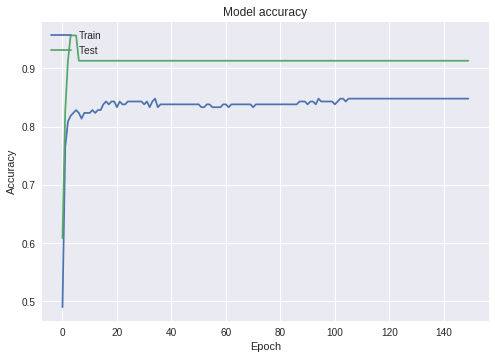

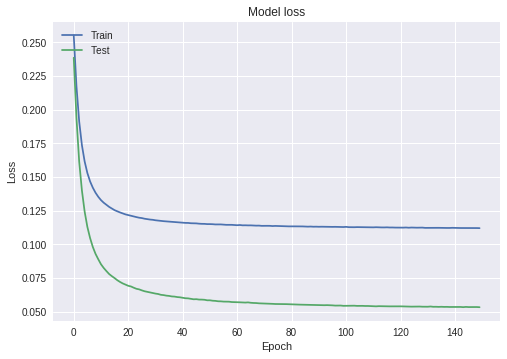

Last validation loss :  0.0532132143220738  | last training loss :  0.11195896770893807
Last validation accuracy :  0.9130434782608695  | last training accuracy :  0.8480392156862745


In [48]:
models.append(test_model(None, Adam(0.0007), 'mse', mod_train_x, train_y))

---
# Best configuration performance on test data

In [49]:
model = models[-1]
test_X_mod = artificial_data(test_X)
score, accuracy = model.evaluate(test_X_mod, test_y, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Score) = 0.12
Test fraction correct (NN-Accuracy) = 0.83


---
# Conclusion
* Adam optimizer worked the best for this data.
* No regularization needed since the network is already low capacity
* Artifical variables helped elevate model performance since it is a shallow network.
* Mean squared error worked as nice and even better than binary entropy for this task
---